# Mini Project - COVID-19 Dataset

## Introduction

The purpose of this research piece is to explore the countries most affected by the pandemic, focusing on those with the highest mortality rate. This will enable us to understand what regions have been the most affected and then try identify what factors could have contributed to this. The final part of the analysis will be focused on a small group of countries - countries at war.

My initial hypothesis is that countries with low GDP per capita, low spending on healthcare, high proportion of population over the age of 70 and low government effectiveness have a higher death rate. The data used in this analysis piece comes from Our World in Data website and I have also included some additional datasets from OECD.

In [44]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from matplotlib.ticker import LogLocator
import matplotlib.transforms as transforms
import seaborn as sns
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.dates as mdates
import datetime as dt
import statsmodels.api as sm
from scipy import stats
import pylab 
from sklearn import datasets
from sklearn.pipeline import Pipeline
from matplotlib.lines import Line2D  
from scipy.stats import kendalltau, pearsonr, spearmanr

In [2]:
df = pd.read_csv('owid-covid-data copy.csv')
df.columns.to_list()
vars1 = df[df['date'] == '2021-03-23'][['iso_code','gdp_per_capita','total_cases_per_million','total_deaths_per_million','total_vaccinations_per_hundred','total_tests_per_thousand','total_cases','total_deaths','aged_70_older']]
vars1['Death Rate'] = vars1['total_deaths']/vars1['total_cases'] * 100

The dataframe includes data between 1st January 2020 and 23rd March 2021

In [9]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.loc[world['name'] == 'France','iso_a3'] = str('FRA')
world.loc[world['name'] == 'Norway','iso_a3'] = str('NOR')
world.loc[world['name'] == 'Kosovo','iso_a3'] = str('OWID_KOS')

In [10]:
vars1_total = world.merge(vars1 ,left_on = 'iso_a3', right_on = 'iso_code', how = 'inner')

## What countries and continents have been affected the most by the pandemic?

/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


(-60, 85)

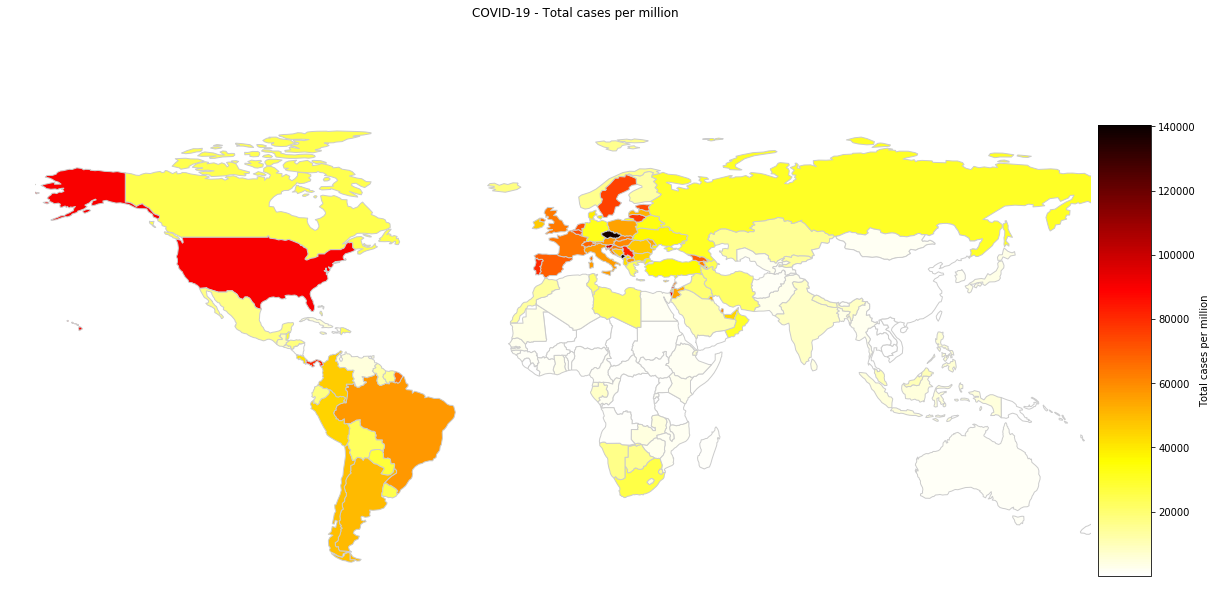

In [11]:
fig,ax =  plt.subplots(1, figsize=(20, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
vars1_total.plot(column='total_cases_per_million', legend=True, ax=ax,cax=cax,cmap='hot_r', linewidth=1,edgecolor='0.8',missing_kwds= dict(color = "lightgrey", hatch = "///"), figsize=(12, 10),legend_kwds={"label":"Total cases per million"})
ax.set_axis_off()
fig.suptitle('COVID-19 - Total cases per million')

xlim = ([-170,  170])
ylim = ([-60,  85])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

From the graph above (which shows the number of cases per million by country) we can see that most cases are concentrated in Europe with Montenegro, Czech Republic, Slovenia and Israel being the most affected. It is also interesting to see the low number of cases in African countries as well as South Asia and Australia.

(-60, 85)

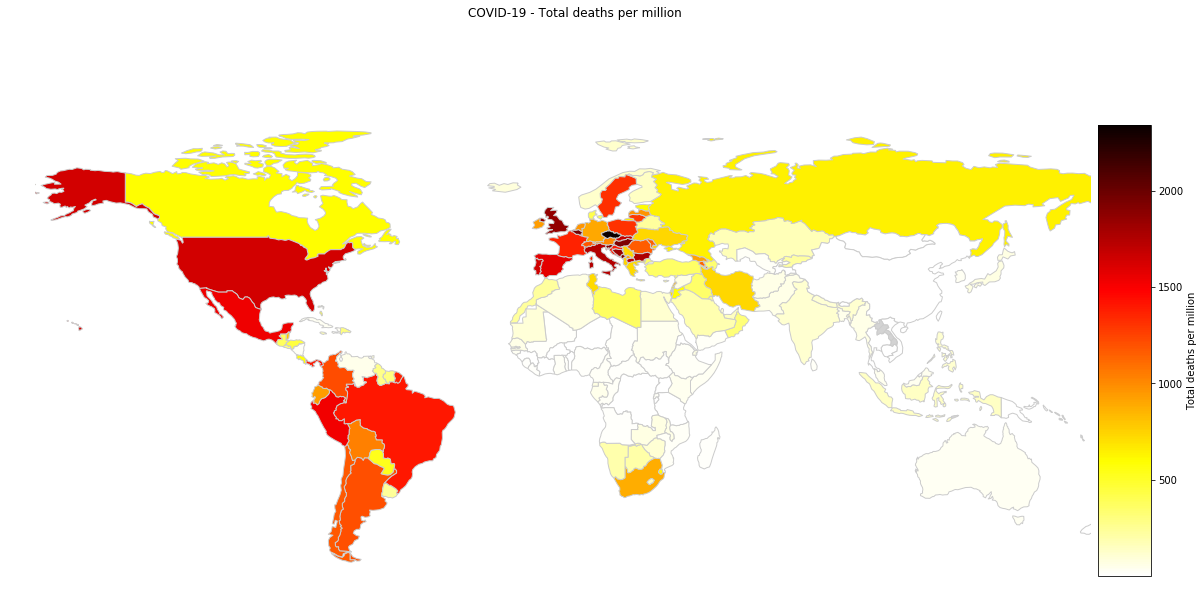

In [12]:
fig,ax =  plt.subplots(1, figsize=(20, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
vars1_total.plot(column='total_deaths_per_million', legend=True, ax=ax,cax=cax,cmap='hot_r', linewidth=1,edgecolor='0.8',missing_kwds= dict(color = "lightgrey", hatch = "///"), figsize=(12, 10),legend_kwds={"label":"Total deaths per million"})
ax.set_axis_off()
fig.suptitle('COVID-19 - Total deaths per million')

xlim = ([-170,  170])
ylim = ([-60,  85])

ax.set_xlim(xlim)
ax.set_ylim(ylim)


From the graph above (which shows the number of deaths per million by country) we can see that most deaths are still concentrated in Europe with Czech Republic, Belgium and Montenegro being the most affected. When looking at the number of deaths, however, we can see that South America has also been significantly more affected, meaning that of more of the cases resulted in deaths or there could also be the hypotesis that the cases were not identified until they resulted in death.

It is interesting to see that certain countries that did not stand out in terms of having a significantly high number of cases, are now amongst the countries with the most deaths per million, such as Mexico.

In [13]:
vars1_total['Pct Rank Cases'] = vars1_total['total_cases_per_million'].rank(pct=True) 
vars1_total['Pct Rank Deaths'] = vars1_total['total_deaths_per_million'].rank(pct=True) 
vars1_total['Pct Rank Death Rate'] = vars1_total['Death Rate'].rank(pct=True) 

vars1_total.loc[vars1_total['name'] == 'Mexico']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,iso_code,gdp_per_capita,total_cases_per_million,total_deaths_per_million,total_vaccinations_per_hundred,total_tests_per_thousand,total_cases,total_deaths,aged_70_older,Death Rate,Pct Rank Cases,Pct Rank Deaths,Pct Rank Death Rate
23,124574795,North America,Mexico,MEX,2307000.0,"POLYGON ((-117.12776 32.53534, -115.99135 32.6...",MEX,17336.469,17086.744,1543.813,4.6,NaN,2203041.0,199048.0,4.321,9.035147,0.566265,0.91358,0.993827


By looking at the percentile rank of the number of cases and deaths per million, we can see that Mexico has a percentile rank of the number of total deaths of 91% meaning that it has a higher number of total deaths per million than 91% of the countries. However, it only has a higher number of cases per million than 51% of countries.

(-60, 85)

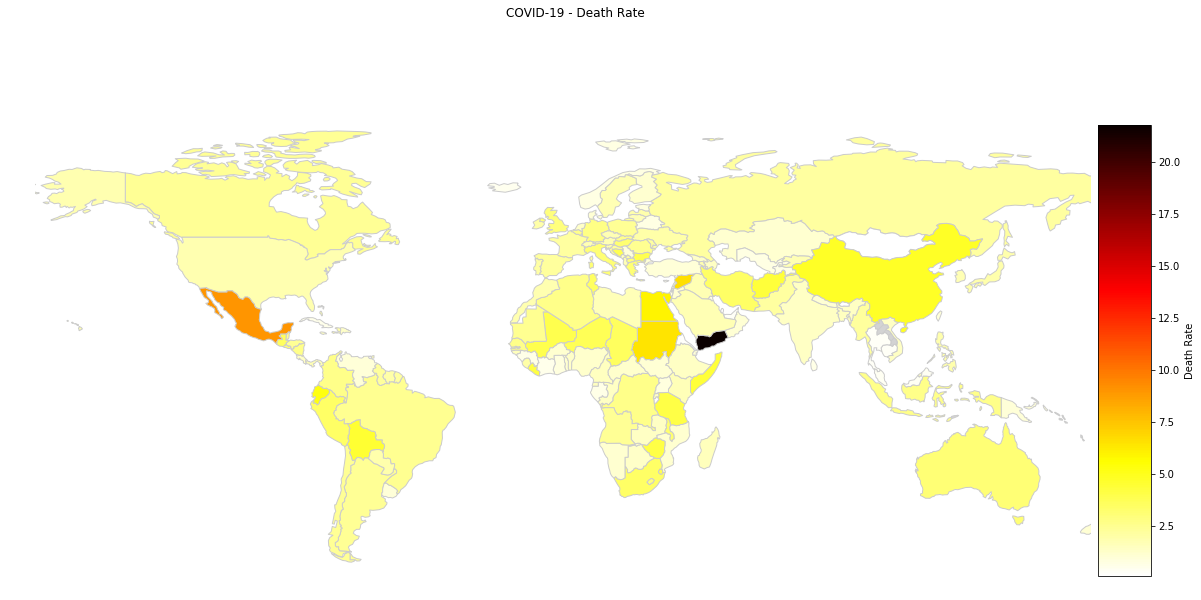

In [14]:
fig,ax =  plt.subplots(1, figsize=(20, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
vars1_total.plot(column='Death Rate', legend=True, ax=ax,cax=cax,cmap='hot_r', linewidth=1,edgecolor='0.8',missing_kwds= dict(color = "lightgrey", hatch = "///"), figsize=(12, 10),legend_kwds={"label":"Death Rate"})
ax.set_axis_off()
fig.suptitle('COVID-19 - Death Rate')

xlim = ([-170,  170])
ylim = ([-60,  85])

ax.set_xlim(xlim)
ax.set_ylim(ylim)


In [15]:
vars1_total.loc[vars1_total['name'] == 'Yemen']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,iso_code,gdp_per_capita,total_cases_per_million,total_deaths_per_million,total_vaccinations_per_hundred,total_tests_per_thousand,total_cases,total_deaths,aged_70_older,Death Rate,Pct Rank Cases,Pct Rank Deaths,Pct Rank Death Rate
149,28036829,Asia,Yemen,YEM,73450.0,"POLYGON ((52.00001 19.00000, 52.78218 17.34974...",YEM,1479.147,121.103,26.319,NaN,NaN,3612.0,785.0,1.583,21.733112,0.060241,0.259259,1.0


In [19]:
vars1_total.sort_values(by = 'Death Rate', ascending = False).head(3)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,iso_code,gdp_per_capita,total_cases_per_million,total_deaths_per_million,total_vaccinations_per_hundred,total_tests_per_thousand,total_cases,total_deaths,aged_70_older,Death Rate,Pct Rank Cases,Pct Rank Deaths,Pct Rank Death Rate
149,28036829,Asia,Yemen,YEM,73450.0,"POLYGON ((52.00001 19.00000, 52.78218 17.34974...",YEM,1479.147,121.103,26.319,NaN,NaN,3612.0,785.0,1.583,21.733112,0.060241,0.259259,1.000000
23,124574795,North America,Mexico,MEX,2307000.0,"POLYGON ((-117.12776 32.53534, -115.99135 32.6...",MEX,17336.469,17086.744,1543.813,4.6,NaN,2203041.0,199048.0,4.321,9.035147,0.566265,0.913580,0.993827
101,18028549,Asia,Syria,SYR,50280.0,"POLYGON ((35.71992 32.70919, 35.70080 32.71601...",SYR,NaN,1013.848,67.597,NaN,NaN,17743.0,1183.0,2.577,6.667418,0.204819,0.388889,0.987654


When looking at the Death Rate (calculated as number of Covid related deaths per 100 cases), Yemen has been by far the most affected country with a death rate of 21.73%, despite having relative low number of cases/ deaths per million. 

Based on research, this could be explained by the medical infrastructure that has already been devastated by five years of war, putting a strain on the medical facilities that are needed in order to look after patients as well as medical equipment (such as ventilators and oxygen). This could also be the reason behind Syria having the second highest death rate in the world, as the country has been significantly affected by civil unrest. Moreover, the high death rate could also be explained by the severe lack of testing facilities meaning that cases are hard to detect and sometimes are only detected when the patient dies. However, the number of tests is not published and therefore cannot be further examined in this analysis. 

Another country that has experienced a high death rate is Mexico. Medical experts say the country kept the rate of COVID testing low, limiting it to symptomatic cases with severe disease, which contributed to low detection rates and a high death rate. Moreover, given the limited hospital capacity, many patients with moderate COVID symptoms were being sent home, without being tested and many of them would later become severely ill and die at home. From this, we can hypothesise that a low level of testing contributes to high death rates as medical staff is unable to monitor the condition of infected patients. However, given the fact that only a limited number of countries publish data on testing, we will not use this variable in order to explain COVID-19 mortality rate.

Text(0.5, 1.0, 'Yemen - New Deaths per Million')

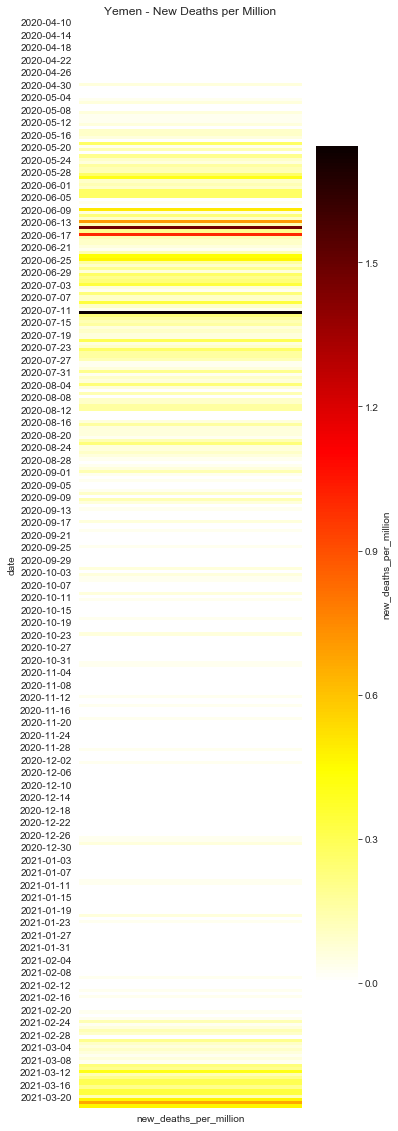

In [16]:
YEM_new_deaths = df[df['iso_code'] == 'YEM'][['date','new_deaths_per_million']]
YEM_new_deaths = YEM_new_deaths.replace(np.nan,0)
YEM_new_deaths = YEM_new_deaths.set_index('date')
plt.figure(figsize=(5,20))
sns.set_style("whitegrid")
ax = sns.heatmap(YEM_new_deaths, cmap='hot_r',cbar_kws={'label': 'new_deaths_per_million'})
plt.title('Yemen - New Deaths per Million')

The heatmap above shows the daily number of new deaths per million for Yemen. We can see that the country has been the worst affected at the start of the pandemic, experiencing the highest number of new deaths on 12th July 2020. Over the following next months, the situation stabilised but we can see that the number of deaths has started to pick up again since the start of March 2021, highlighting that the country is experiencing another COVID-19 wave.

Text(0.5, 1.0, 'Mexico - New Deaths per Million')

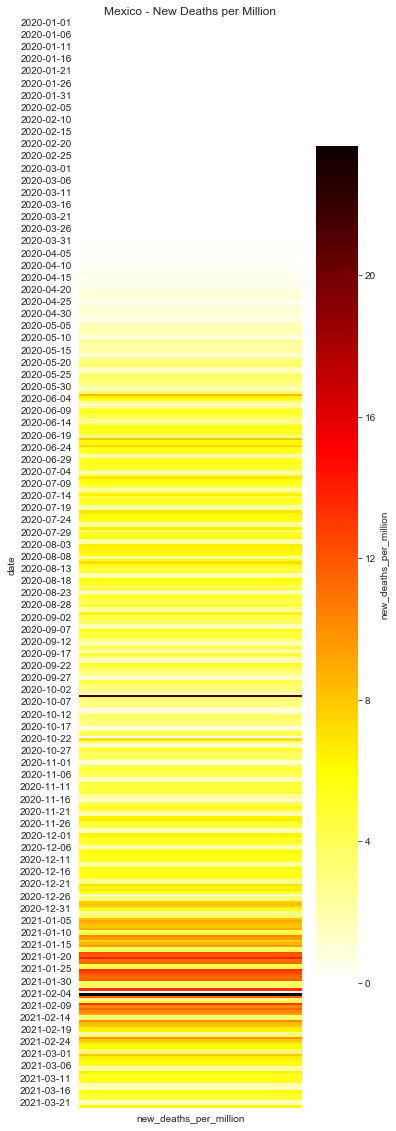

In [20]:
MEX_new_deaths = df[df['iso_code'] == 'MEX'][['date','new_deaths_per_million']]
MEX_new_deaths = MEX_new_deaths.replace(MEX_new_deaths[MEX_new_deaths['new_deaths_per_million']<0] , 0)
MEX_new_deaths = MEX_new_deaths.set_index('date')
plt.figure(figsize=(5,20))
ax = sns.heatmap(MEX_new_deaths, cmap='hot_r',cbar_kws={'label': 'new_deaths_per_million'})
plt.title('Mexico - New Deaths per Million')

The heatmap above shows the daily number of new deaths per million for Mexico. We can see that the country has been the worst affected in the middle of the pandemic but also recently at the start of 2021, when the country was hit with a second wave of deaths, similar to Yemen. 

Text(0.5, 1.0, 'Syria - New Deaths per Million')

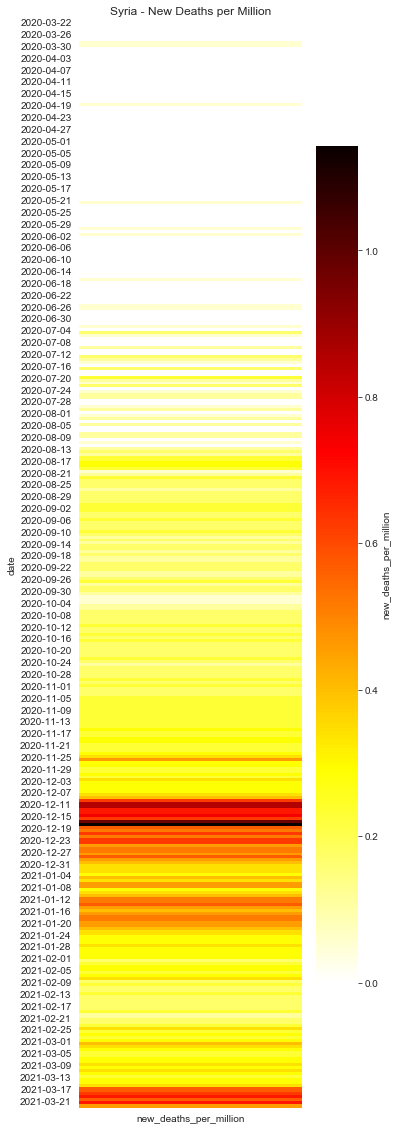

In [21]:
SYR_new_deaths = df[df['iso_code'] == 'SYR'][['date','new_deaths_per_million']]
SYR_new_deaths = SYR_new_deaths.replace(SYR_new_deaths[SYR_new_deaths['new_deaths_per_million']<0] , 0)
SYR_new_deaths = SYR_new_deaths.set_index('date')
plt.figure(figsize=(5,20))
ax = sns.heatmap(SYR_new_deaths, cmap='hot_r',cbar_kws={'label': 'new_deaths_per_million'})
plt.title('Syria - New Deaths per Million')

The heatmap above shows the daily number of new deaths per million for Syria. Similar to Mexico and Yemen, Syria is experiencing a second wave of covid deaths which has roughly started since the beginning of the year.

Looking at the geographical representation of the death rate, it is unclear what continent has been the worst affected and therefore, we are going to look at the mean death rate per continent.

In [22]:
vars1_total[['continent','name','Death Rate']].groupby('continent').mean().sort_values(by = 'Death Rate', ascending = False)


,Death Rate
continent,
South America,2.599898
North America,2.496989
Africa,2.198377
Oceania,2.033262
Europe,2.026489
Asia,1.986466


From the table above that South America has the highest average death rate followed closely by North America. It is interesting to see that although Yemen has the highest death rate globally, Asia as a continent has the lowest death rate suggesting that other Asian countries have a much lower death rate and Yemen could just be an outlier. Thus the factors that could explain the death rate in Yemen may not be able to capture the death rate trends globally. 

Next, I am going to look in a bit more detail at the death rate distribution.

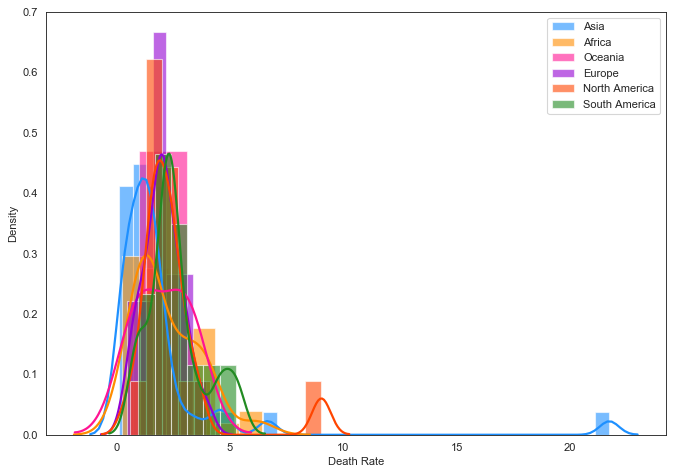

In [30]:
#Continents
vars1_total[['continent','name','Death Rate']].groupby('continent').mean()

import seaborn as sns
sns.set_style("white")

cont = vars1_total[['continent','name','Death Rate']].dropna()
x1 = cont.loc[cont.continent=='Asia', 'Death Rate']
x2 = cont.loc[cont.continent=='Africa', 'Death Rate']
x3 = cont.loc[cont.continent=='Oceania', 'Death Rate']
x4 = cont.loc[cont.continent=='Europe', 'Death Rate']
x5 = cont.loc[cont.continent=='North America', 'Death Rate']
x6 = cont.loc[cont.continent=='South America', 'Death Rate']
# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
ax = sns.distplot(x1, color="dodgerblue", label="Asia", **kwargs)
ax = sns.distplot(x2, color="darkorange", label="Africa", **kwargs)
ax = sns.distplot(x3, color="deeppink", label="Oceania", **kwargs)
ax = sns.distplot(x4, color="darkviolet", label="Europe", **kwargs)
ax = sns.distplot(x5, color="orangered", label="North America", **kwargs)
ax = sns.distplot(x6, color="forestgreen", label="South America", **kwargs)
ax.set_ylabel('Density')
ax.set_xlabel('Death Rate')

plt.legend()


#Decrease alpha

From the density plot above we can see that the distribution is more negatively skewed meaning that values are more concentrated towards higher death rates. We can clearlys see the impact Yemen has on the distribution of Asia death rate (the furthest blue barplot) and Mexico on the distribution of North America rate (furthest rate red barplot) . 

## What factors could be used to explain COVID-19 mortality rate?

Now that we know what areas have been the most impacted by the pandemic, the second part of the analysis will focus on attempting to understand the factors that could be be used to explain country's death rates. The variables that I am going to focus on are: GDP per capita, government effectiveness, percentage of GDP spent on healthcare and the proportion of the population aged 70 or older. 

Government effectiveness captures the perceptions of the quality of public services, the quality of the civil service and the degree of its independence from political pressures, the quality of policy formulation and implementation, and the credibility of the government's commitment to such policies. The government effectiveness variable has values between -2.5 (weakest) and 2.5 (strongest).

The reason why I decided to not include the number of tests taken for each country is because the data is not public for some a large proportion of the countries and I want to have as much data as possible to capture the possible trends.

In [32]:
#Other variables to explain high death rates
gov_eff = pd.read_excel('gov_eff.xlsx',index_col = 0)
healthcare = pd.read_excel('healthcare.xlsx',sheet_name = 'Data', index_col=0)

In [33]:
vars2 = df[df['date'] == '2021-03-23'][['location','total_cases','total_deaths','total_deaths_per_million']]
vars2 = vars2.set_index('location')

variables = df[['iso_code','location','continent','aged_70_older','gdp_per_capita','hospital_beds_per_thousand']]
variables = variables.drop_duplicates()
variables = variables.set_index('location')

variables = pd.merge(variables,vars2, right_index = True, left_index = True)
variables['Gov Eff'] = gov_eff
variables['Healthcare'] = healthcare
variables['Death Rate'] = variables['total_deaths'] / variables['total_cases'] * 100
variables = variables.dropna(how='any')

In [34]:
rdata = variables[['iso_code','continent','Gov Eff','aged_70_older','total_cases','total_deaths','total_deaths_per_million','hospital_beds_per_thousand','gdp_per_capita','Healthcare','Death Rate']].reset_index(drop=False)
vars2_total = world.merge(rdata ,left_on = 'iso_a3', right_on = 'iso_code', how = 'outer')

We are now going to visually see the relationship between: 
- death rate, aged_70_older and Healthcare
- death rate, gdp_per_capita and Healthcare
- death rate, Gov Eff and Healthcare
- death rate, hospital_beds_per_thousand and gdp_per_capita


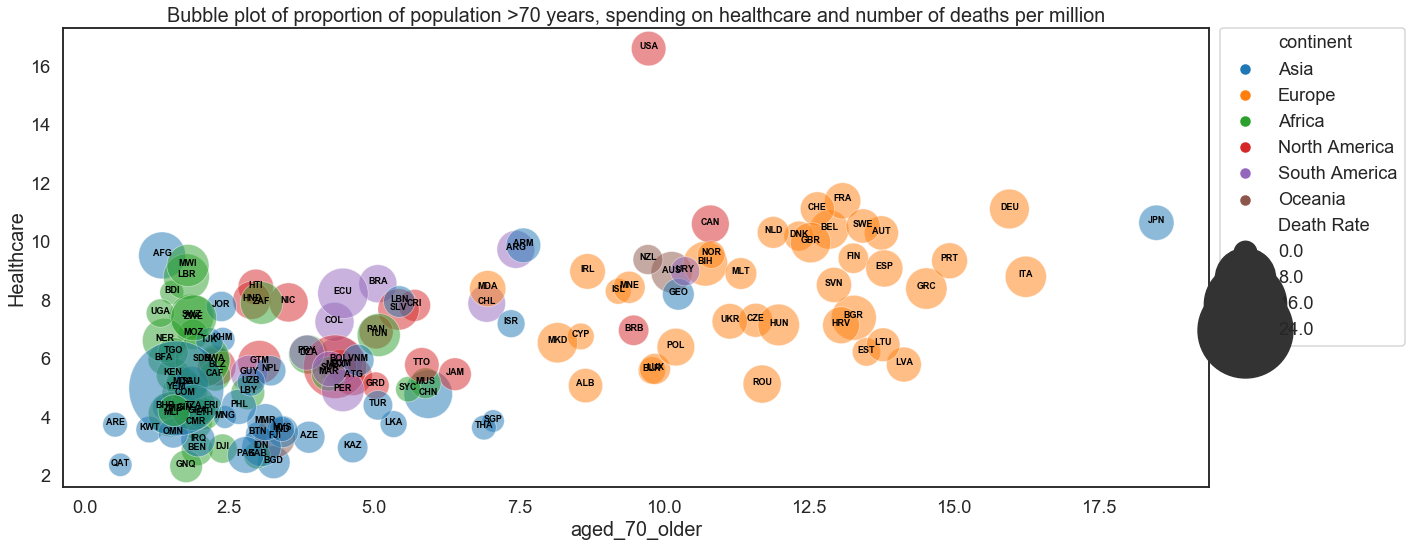

In [35]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(20,8))
ax = sns.scatterplot(x="aged_70_older", 
                y="Healthcare",
                size="Death Rate",
                alpha=0.5,
                sizes=(500,9000),
                hue="continent",
                data=rdata)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
ax.grid(False)
plt.xlabel("aged_70_older")
plt.ylabel("Healthcare")
plt.title("Bubble plot of proportion of population >70 years, spending on healthcare and number of deaths per million")
plt.tight_layout()

for line in range(0,rdata.shape[0]):
     ax.text(rdata.aged_70_older[line], rdata.Healthcare[line], rdata.iso_code[line], horizontalalignment='center', fontsize=9, color='black', weight='semibold')


From the plot above we can clearly see that European countries have a higher proportion of their population aged over 70 whilst African countries have the lowest proportion of their population aged over 70. Focusing on the Y-axis (spending on healthcare) we can see that there seems to be higher death rates associated with lower healthcare spending, with mostly Asian countries finding themselves in this category.

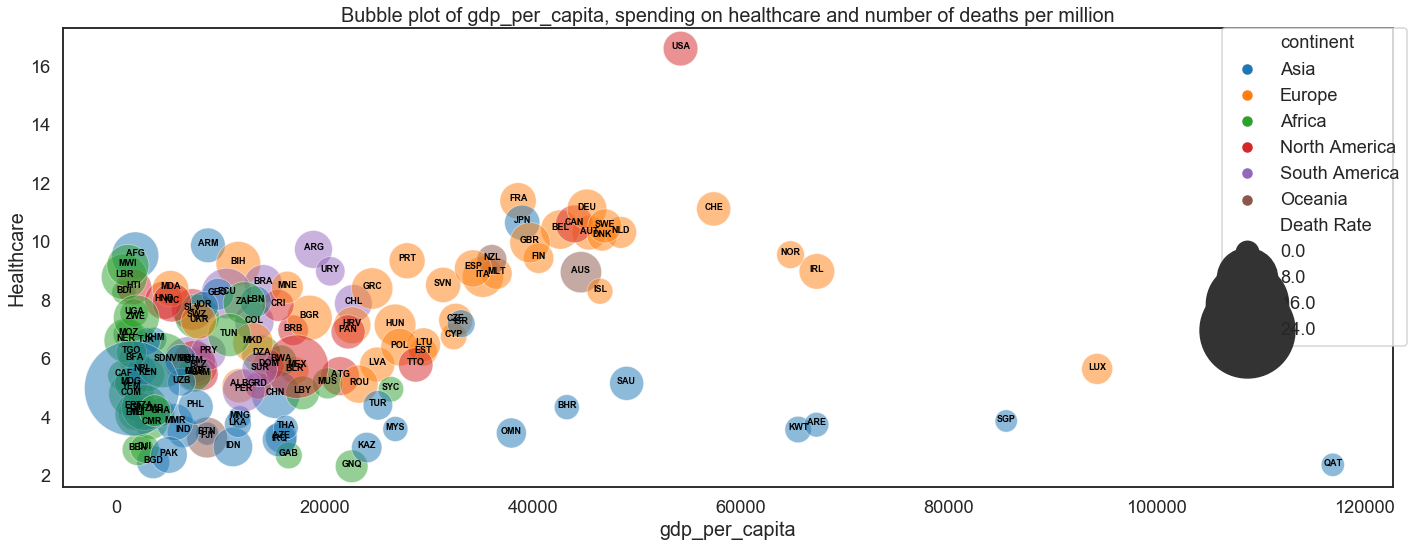

In [36]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(20,8))
ax = sns.scatterplot(x="gdp_per_capita", 
                y="Healthcare",
                size="Death Rate",
                alpha=0.5,
                sizes=(500,9000),
                hue="continent",
                data=rdata)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
ax.grid(False)
plt.xlabel("gdp_per_capita")
plt.ylabel("Healthcare")
plt.title("Bubble plot of gdp_per_capita, spending on healthcare and number of deaths per million")
plt.tight_layout()

for line in range(0,rdata.shape[0]):
     ax.text(rdata.gdp_per_capita[line], rdata.Healthcare[line], rdata.iso_code[line], horizontalalignment='center', fontsize=9, color='black', weight='semibold')

From the plot above we can clearly see that African countries have low levels of GDP per capita, however the death rate is not relatively higher in these countries. We also cannot see any clear trend regarding death rate and spending on healthcare.

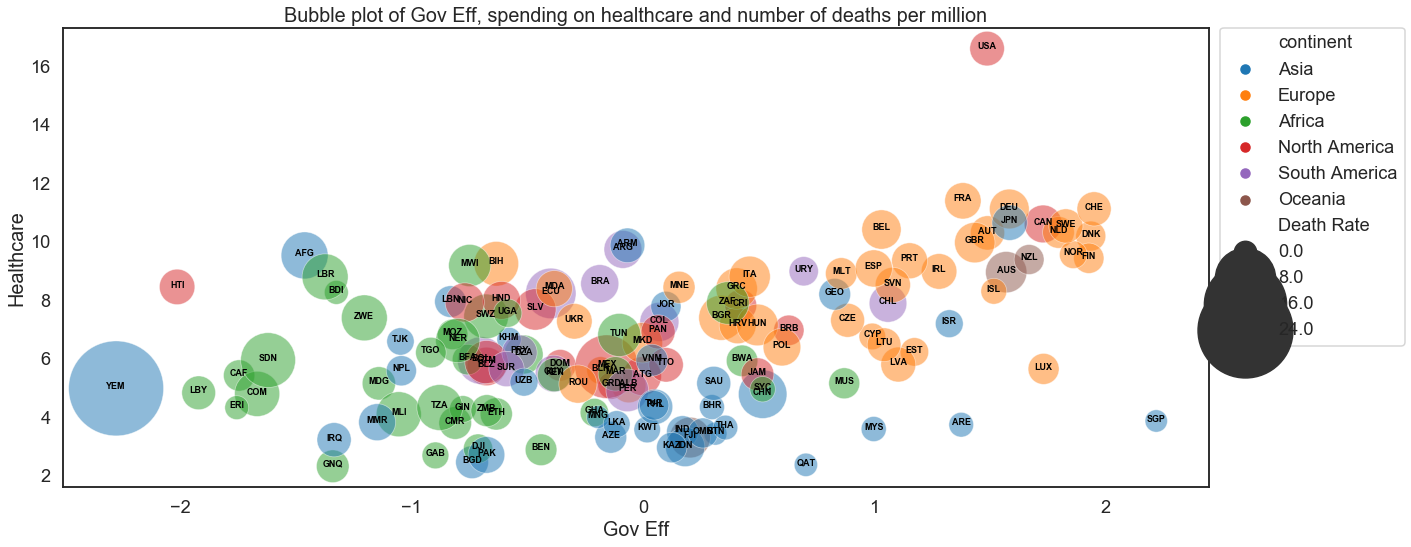

In [37]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(20,8))
ax = sns.scatterplot(x="Gov Eff", 
                y="Healthcare",
                size="Death Rate",
                alpha=0.5,
                sizes=(500,9000),
                hue="continent",
                data=rdata)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

plt.xlabel("Gov Eff")
plt.ylabel("Healthcare")
plt.title("Bubble plot of Gov Eff, spending on healthcare and number of deaths per million")
plt.tight_layout()

for line in range(0,rdata.shape[0]):
     ax.text(rdata['Gov Eff'][line], rdata.Healthcare[line], rdata.iso_code[line], horizontalalignment='center', fontsize=9, color='black', weight='semibold')

From the graph above we can see that there appears to be a weak realtionship betwen government effectiveness and death rate, with higher death rates corresponding to low governemnt effectivness scores. It is also interesting to see that Yemen, the country with the highest death rate, has the lowest governemnt effectiveness score.

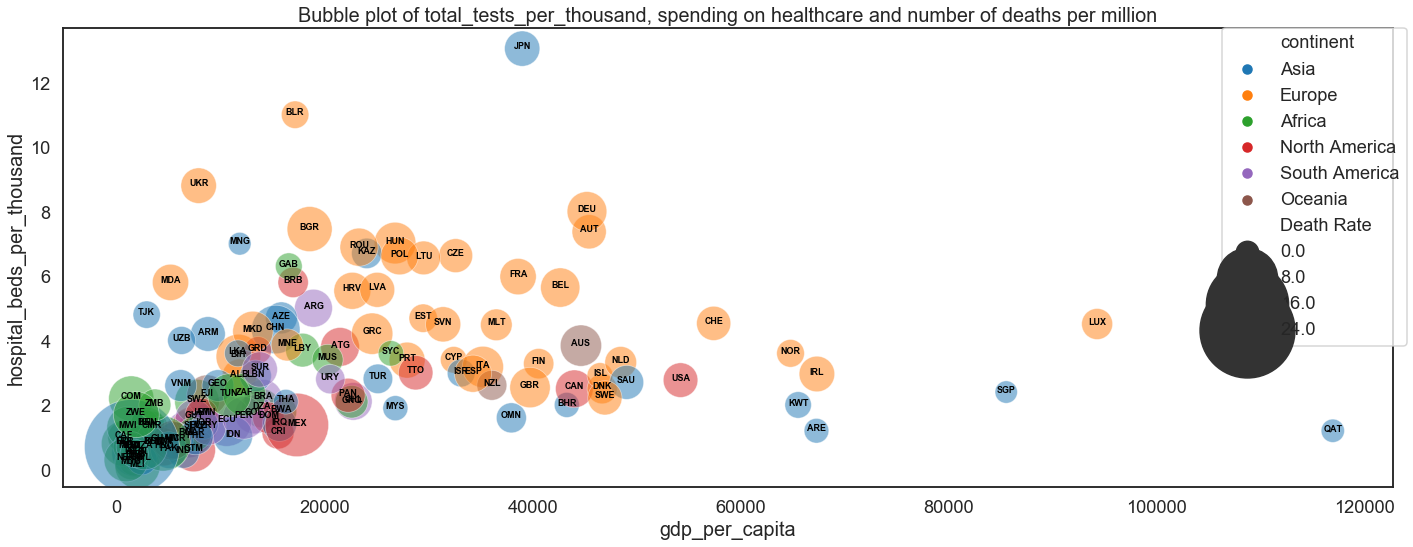

In [38]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(20,8))
ax = sns.scatterplot(x="gdp_per_capita", 
                y="hospital_beds_per_thousand",
                size="Death Rate",
                alpha=0.5,
                sizes=(500,9000),
                hue="continent",
                data=rdata)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
ax.grid(False)
plt.xlabel("gdp_per_capita")
plt.ylabel("hospital_beds_per_thousand")
plt.title("Bubble plot of total_tests_per_thousand, spending on healthcare and number of deaths per million")
plt.tight_layout()

for line in range(0,rdata.shape[0]):
     ax.text(rdata.gdp_per_capita[line], rdata.hospital_beds_per_thousand[line], rdata.iso_code[line], horizontalalignment='center', fontsize=9, color='black', weight='semibold')

From the graph above we can see that countries with a low number of hospital beds per housand tend to be associated with higher death rates.

,aged_70_older,gdp_per_capita,hospital_beds_per_thousand,Gov Eff,Healthcare,Death Rate
aged_70_older,1.000000e+00,1.000806e-08,1.024003e-20,5.367707e-23,6.965839e-16,0.558152
gdp_per_capita,1.000806e-08,1.000000e+00,1.898292e-04,2.367977e-26,3.828184e-03,0.014439
hospital_beds_per_thousand,1.024003e-20,1.898292e-04,1.000000e+00,2.142329e-07,1.029510e-03,0.195683
Gov Eff,5.367707e-23,2.367977e-26,2.142329e-07,1.000000e+00,9.864322e-08,0.000597
Healthcare,6.965839e-16,3.828184e-03,1.029510e-03,9.864322e-08,1.000000e+00,0.331109
Death Rate,5.581523e-01,1.443855e-02,1.956827e-01,5.969087e-04,3.311091e-01,1.000000


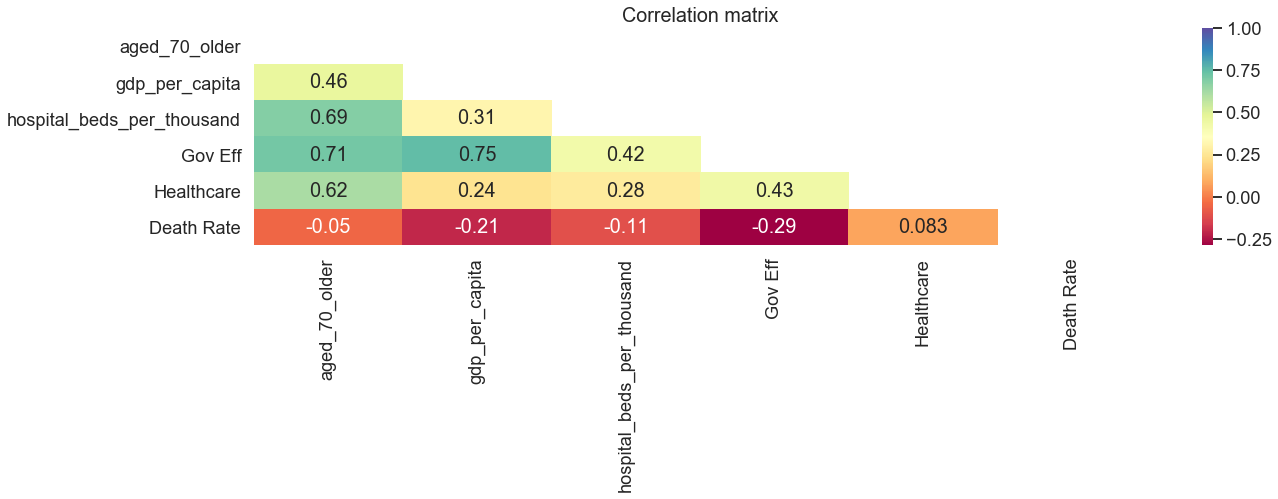

In [43]:
#Initial Analysis
#---Correlation Matrix
exclude = ['total_cases_per_million','total_cases','total_deaths','total_deaths_per_million']
variables_corr = variables[variables.columns[~variables.columns.isin(exclude)]]
corrs = variables_corr.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,4))
sns.heatmap(corrs, cmap='Spectral', mask=mask, annot=True)
plt.title('Correlation matrix')

def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

    
corr = variables_corr.corr(method=pearsonr_pval)
corr 

From the correlation matrix above we can see that the following:
- there is a weak negative correlation (-0.29) between the death rate and the share of government effectiveness score. This supports my initial hypothesis: government's ineffectiveness translates in a low inability to handle the pandemic situation which in turn leads to a higher death rate. This is significant at the 1% level.


- there is also a weak negative correlation (-0.21) between the death rate and gdp per capita, suggesting that poorer countries have higher mortality rates. This is significant at the 5% level.

- there seems to be no relationship between healthcare spending and the death rate. This is an interesting finding, however it could be explained by the fact that the healthcare data includes the 2018 values and during the pandemic government healthcare budget has significantly changed in order to ameliorate the situation.

- surprisingly, there is no relationship between the proportion of the population aged 70 or older and death rate which goes against my initial hypothesis. However, this could be explained by the fact that in some countries, the older population has recieved guidance to shield which could have meant that through social isolation, they have been protected against the pandemic.

In order to understand the relationship between the variables that could potentially explain the death rate, I will look at various regression models.


In [45]:
#1. GDP
Y = np.log(variables['Death Rate'].to_frame())
X = np.log(variables['gdp_per_capita'].to_frame())
X = sm.add_constant(X)

results = sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Death Rate   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     3.919
Date:                Sat, 24 Apr 2021   Prob (F-statistic):             0.0497
Time:                        23:56:21   Log-Likelihood:                -174.93
No. Observations:                 139   AIC:                             353.9
Df Residuals:                     137   BIC:                             359.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.5438      0.572      2.698      0.008       0.412       2.675
gdp_per_capita    -0.1201      0.061     -1.980      0.050      -0.240      -0.000
==============================================================================
Omnibus:                       30.097   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.119
Skew:                          -1.023   Prob(JB):                     7.94e-12
Kurtosis:                       5.154   Cond. No.                         75.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The first regression model I considered was log(death rate) = alpha + beta * log(gdp_per_capita) + error.

From the regression above we can see that 2.8% of the variation in the death rate can be explained by the GDP per capita variable. The GDP per capita variable is also siginicant at the 5% level, providing strong evidence of statistical significance. Given the model specification (log-log), the interpretation of the coefficient on gdp_per_capita variable is the following: for a 1% increase in the GDP per capita, we can expect the death rate to drop by 0.1201%.

In [578]:
#2. Gov Eff
Y = np.log(variables['Death Rate'].to_frame())
X = variables['Gov Eff'].to_frame()
X = sm.add_constant(X)

results = sm.OLS(Y,X).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Death Rate   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     6.553
Date:                Mon, 19 Apr 2021   Prob (F-statistic):             0.0116
Time:                        16:12:47   Log-Likelihood:                -173.65
No. Observations:                 139   AIC:                             351.3
Df Residuals:                     137   BIC:                             357.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4305      0.072      5.962      0.000       0.288       0.573
Gov Eff       -0.1878      0.073     -2.560      0.012      -0.333      -0.043
==============================================================================
Omnibus:                       30.595   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.103
Skew:                          -1.074   Prob(JB):                     2.17e-11
Kurtosis:                       4.965   Cond. No.                         1.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The second regression model I cosnidered was log(death rate) = alpha + beta * gov_effectiveness + error.

From the regression above we can see that 4.6% of the variation in the death rate can be explained by the government effectiveness variable, R-Squared and Adjusted R-Squared being higher than for the GDP per capita model. The government effectiveness variable is also significant at the 5% level, providing strong evidence of statistical significance. Given the model specification (log-lin), the interpretation of the coefficient on government effectiveness is the following: for a 1 unit increase in the level of government effectiveness, we can expect a 0.1878% decrease in the death rate.

Compared to the previous model, we can assume that government effectiveness is a stronger predictor of the variable we are trying to explain.

In [46]:
#3. Over 70s
Y = np.log(variables['Death Rate'].to_frame())
X = variables['aged_70_older'].to_frame()
X = sm.add_constant(X)

results = sm.OLS(Y,X).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Death Rate   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.159
Date:                Sat, 24 Apr 2021   Prob (F-statistic):              0.144
Time:                        23:58:57   Log-Likelihood:                -175.81
No. Observations:                 139   AIC:                             355.6
Df Residuals:                     137   BIC:                             361.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2729      0.124      2.200      0.030       0.028       0.518
aged_70_older     0.0244      0.017      1.469      0.144      -0.008       0.057
==============================================================================
Omnibus:                       26.185   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.905
Skew:                          -0.822   Prob(JB):                     5.36e-12
Kurtosis:                       5.502   Cond. No.                         12.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The third regression model I considered was log(death rate) = alpha + beta * aged_70_older + error.

From the regression above we can see that only 1.6% of the variation in the death rate can be explained by the the share of the population that is 70 years. The variable is not siginicant at the 10% level, providing evidence that it is not statistically significant in explaining the variation in death rate.

In [47]:
#4. Hospital Beds
Y = np.log(variables['Death Rate'].to_frame())
X = np.log(variables['hospital_beds_per_thousand'].to_frame())
X = sm.add_constant(X)

results = sm.OLS(Y,X).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Death Rate   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.4320
Date:                Sat, 24 Apr 2021   Prob (F-statistic):              0.512
Time:                        23:59:13   Log-Likelihood:                -176.67
No. Observations:                 139   AIC:                             357.3
Df Residuals:                     137   BIC:                             363.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.4596      0.095      4.833      0.000       0.272       0.648
hospital_beds_per_thousand    -0.0549      0.083     -0.657      0.512      -0.220       0.110
==============================================================================
Omnibus:                       30.644   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.443
Skew:                          -0.998   Prob(JB):                     5.54e-13
Kurtosis:                       5.400   Cond. No.                         2.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The third regression model I considered was log(death rate) = alpha + beta * log(hospital_beds_per_thousand) + error.

From the regression above we can see that this variable is not statistically significant in explaining the variation in the death rate.

In [48]:
#5. Healthcare
Y = np.log(variables['Death Rate'].to_frame())
X = np.log(variables['Healthcare'].to_frame())
X = sm.add_constant(X)

results = sm.OLS(Y,X,missing = 'drop').fit()
results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Death Rate   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     15.34
Date:                Sat, 24 Apr 2021   Prob (F-statistic):           0.000141
Time:                        23:59:31   Log-Likelihood:                -169.52
No. Observations:                 139   AIC:                             343.0
Df Residuals:                     137   BIC:                             348.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8343      0.328     -2.545      0.012      -1.483      -0.186
Healthcare     0.6978      0.178      3.917      0.000       0.346       1.050
==============================================================================
Omnibus:                       18.785   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.584
Skew:                          -0.611   Prob(JB):                     3.09e-08
Kurtosis:                       5.116   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The third regression model I considered was log(death rate) = alpha + beta * log(Healthcare) + error.

From the regression above we can see that 10% of the variation in the death rate can be explained by the Healthcare variable which is also significant at the 1% level. We expect that a 1% increase in healthcare spending leads to a 0.6978% increase in death rate which is quite surprising. When we looked at the correlation matrix, the weaker relationship between the two variables could be explained by the fact that in this regression model we have used log as the data was more skewed.

In [589]:
#GDP + Healthcare + Gov Eff
Y = np.log(variables['Death Rate'].to_frame())
X = pd.merge(np.log(variables['gdp_per_capita']),np.log(variables['Healthcare']),left_index=True, right_index=True)
X['Gov Eff'] =  variables['Gov Eff']

X = sm.add_constant(X)

results = sm.OLS(Y,X,missing = 'drop').fit()
results.summary()


### Healthcare + Gov Eff try this!

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Death Rate   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     14.46
Date:                Mon, 19 Apr 2021   Prob (F-statistic):           3.20e-08
Time:                        16:23:20   Log-Likelihood:                -157.53
No. Observations:                 139   AIC:                             323.1
Df Residuals:                     135   BIC:                             334.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.7921      1.010     -2.764      0.007      -4.790      -0.794
gdp_per_capita     0.1383      0.095      1.453      0.149      -0.050       0.327
Healthcare         1.0819      0.182      5.933      0.000       0.721       1.443
Gov Eff           -0.4898      0.123     -3.973      0.000      -0.734      -0.246
==============================================================================
Omnibus:                       21.264   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.469
Skew:                          -0.778   Prob(JB):                     8.90e-08
Kurtosis:                       4.784   Cond. No.                         153.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

When combining the explanatory variables in order to construct a multivariate model, we can see that GDP per capits, Healthcare and Gov Eff explain together 24.3% of the variation in the death rate. However, now the GDP per capita is no longer significant. The last model I am going to try is just looking at the healthcare and government effectiveness variables and see whether when building a model with just the two, the variables are still significant.

In [49]:
#Healthcare + Gov Eff
Y = np.log(variables['Death Rate'].to_frame())
X = pd.merge(variables['Gov Eff'],np.log(variables['Healthcare']),left_index=True, right_index=True)

X = sm.add_constant(X)

results = sm.OLS(Y,X,missing = 'drop').fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Death Rate   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     20.46
Date:                Sun, 25 Apr 2021   Prob (F-statistic):           1.70e-08
Time:                        00:00:45   Log-Likelihood:                -158.61
No. Observations:                 139   AIC:                             323.2
Df Residuals:                     136   BIC:                             332.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4025      0.326     -4.297      0.000      -2.048      -0.757
Gov Eff       -0.3435      0.071     -4.807      0.000      -0.485      -0.202
Healthcare     1.0243      0.179      5.732      0.000       0.671       1.378
==============================================================================
Omnibus:                       24.831   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.297
Skew:                          -0.858   Prob(JB):                     1.08e-09
Kurtosis:                       5.047   Cond. No.                         12.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The regression model above shows a slightly lower R-Squared but in this case both variables are statistically significant.

In conclusion form the regression models, we can assume that healthcare spending and government effectiveness are good variables that can explain the variation in death rates. What is interesting is that, there seems to be a positive relation between spending on healthcare and the death rate, which does not support my initial hypothesis. This could be because the healthcare variable captures spending on various conditions not including COVID-19 as the values are from before the pandemic happened. Also, The medical equipment and resources needed in order to manage the pandemic are different from other medical conditions on which the healthcare spending could have been directed towards. Thus, when the pandemic hit, countries with high level of healthcare spending did not have the financial resources for specialised medical equipment or were not able to move resources around.

## How does the situation look for countries at war?

Now that we have identified the countries worst affected by the pandemic and the factors that could explain COVID-19 mortality, I want to focus on a specific groups of countries - countries at war. The reason why I decided to focus on these countries is because Yemen clearly stood out in its significantly high death rate and I am interested to see whether the story is similar for other countries currently at war. Afghanistan, Saudi Arabia, Ethiopia, Sudan and Yemen currently face major wars (10,000 or more combat-related deaths in current or past year).

In [50]:
wars = ['AFG','SAU','ETH','SDN','YEM']
df_wars = variables[variables['iso_code'].isin(wars)]
df_wars.loc['Global Average'] = variables[~variables['iso_code'].isin(wars)].mean(axis = 0)
df_wars = df_wars.drop('continent', axis =1)
df_wars = df_wars.reset_index(drop = False)

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


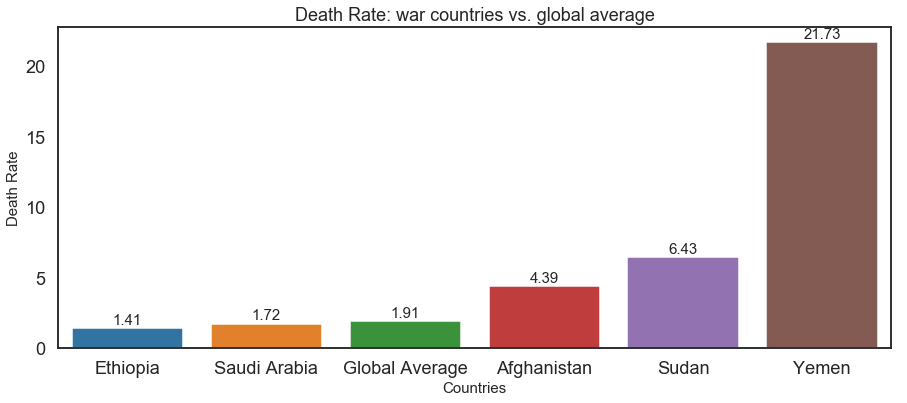

In [51]:
plt.figure(figsize=(13,6))
plots = sns.barplot(x='location',
            y="Death Rate", 
            data=df_wars.sort_values(by = 'Death Rate'))
plt.xlabel("Countries", size=15)
plt.ylabel("Death Rate", size=15)
plt.title("Death Rate: war countries vs. global average", size=18)
plt.tight_layout()
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()
 

It is important to first mention that the global average for all parameters does not include the countries at war in order for the value to not be skewed. We can see that three out of five countries at war have significantly higher death rates compared to global average. The exceptions are Saudia Arabia (which we will see from the following analysis that although it is a country at war, it does not exhibit the same characteristics as the other countries) and Ethiopia. 

Let's now look at whether the hypothesis of the variables that could be used to explain death rates, holds for these countries. 

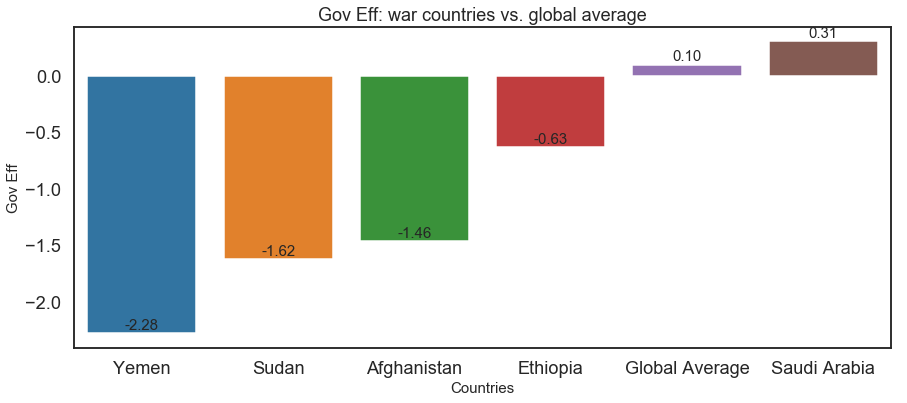

In [52]:
plt.figure(figsize=(13,6))
plots = sns.barplot(x='location',
            y="Gov Eff", 
            data=df_wars.sort_values(by = 'Gov Eff'))
plt.xlabel("Countries", size=15)
plt.ylabel("Gov Eff", size=15)
plt.title("Gov Eff: war countries vs. global average", size=18)
plt.tight_layout()
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()
 

We can also see that all countries at war but Saudi Arabia have lower government effectivness compared to global average which as seen above contributes to higher death rates.

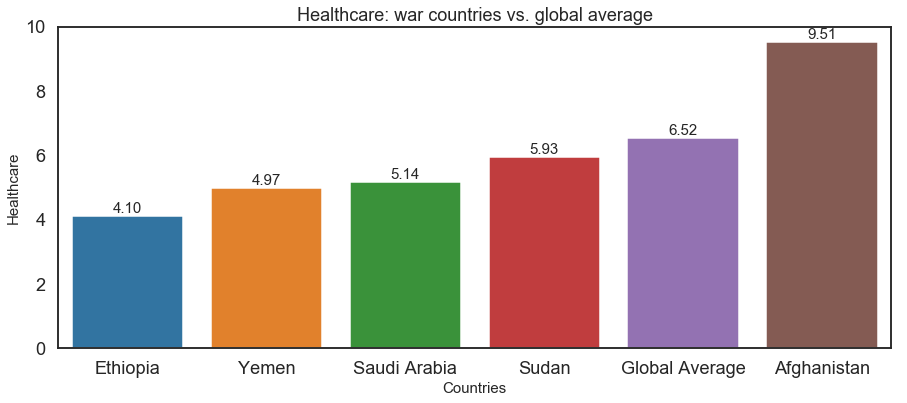

In [53]:
plt.figure(figsize=(13,6))
# make barplot and sort bars
plots = sns.barplot(x='location',
            y="Healthcare", 
            data=df_wars.sort_values(by = 'Healthcare'))
# set labels
plt.xlabel("Countries", size=15)
plt.ylabel("Healthcare", size=15)
plt.title("Healthcare: war countries vs. global average", size=18)
plt.tight_layout()
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()
 

We can also see that all countries at war but Afghanistan have lower spending on healthcare compared to global average. Although previous analysis has showed a positive relationship between healthcare spending and death rates, this hypothesis may not hold for countries at war given the impact the war has had on healthcare facilities. There could also be the fact that these countries have large percentage of GDP spent on defence in order to handle the unrest meaning that very little resources are allocated to healthcare.

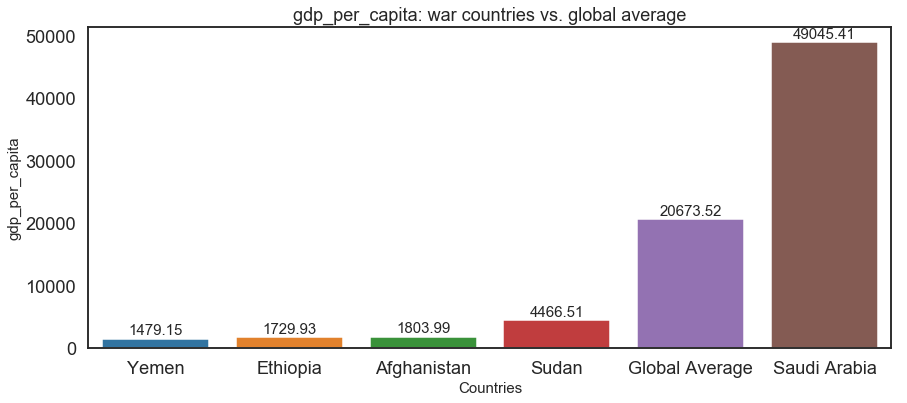

In [54]:
plt.figure(figsize=(13,6))
# make barplot and sort bars
plots = sns.barplot(x='location',
            y="gdp_per_capita", 
            data=df_wars.sort_values(by = 'gdp_per_capita'))
# set labels
plt.xlabel("Countries", size=15)
plt.ylabel("gdp_per_capita", size=15)
plt.title("gdp_per_capita: war countries vs. global average", size=18)
plt.tight_layout()
for bar in plots.patches:
    
 plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()
 

We can also see that all countries at war but Saudi Arabia have lower levels of gdp per capita compared to global average.

## Conclusion

In conclusion, there are a few interesting points that can be taken away from the analysis:
- Europe has been significantly more affected in terms of total cases/ deaths per million
- When looking at death rates however, Yemen, Mexico and Syria have experienced the highest death rates globally. Sadly, these countries seem to experience another COVID-19 death wavev
- Spending on healthcare and government effectiveness can be used to explain the variation in death rates
- Countries currently at major wars have death rates above global average with the exception of Saudi Arabia 

https://hackmd.io/2qS0MkvTSX2527GgqfpffA